In [2]:
import yfinance as yf

In [3]:
tsla_df = yf.download('TSLA', 
                      start='2019-01-01', 
                      end='2019-12-31', 
                      progress=False)
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,306.100006,315.130005,298.799988,310.119995,310.119995,11658600
2019-01-03,307.000000,309.399994,297.380005,300.359985,300.359985,6965200
2019-01-04,306.000000,318.000000,302.730011,317.690002,317.690002,7394100
2019-01-07,321.720001,336.739990,317.750000,334.959991,334.959991,7551200
2019-01-08,341.959991,344.010010,327.019989,335.350006,335.350006,7008500


In [4]:
ticker = yf.Tickers('ftec amzn tsla msft aapl goog')

In [28]:
closes = ticker.history(period='5y')['Close']

[*********************100%***********************]  6 of 6 completed


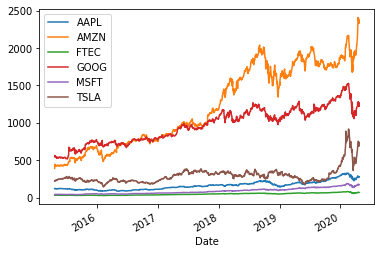

In [29]:
closes.plot()

In [7]:
import pandas as pd
from sklearn import preprocessing

x = closes.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
closes = pd.DataFrame(x_scaled, index= closes.index, columns=closes.columns)

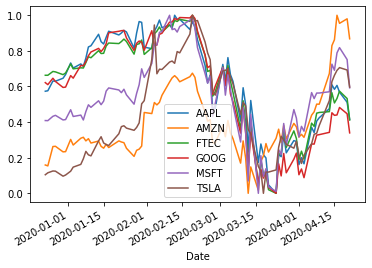

In [8]:
closes.plot()

In [9]:
import statsmodels.api as sm

In [10]:
closes[1:]

,AAPL,AMZN,FTEC,GOOG,MSFT,TSLA
Date,,,,,,
2019-12-24,0.575969,0.153913,0.662981,0.610420,0.408053,0.115120
2019-12-26,0.630688,0.262664,0.684311,0.646244,0.432434,0.125351
2019-12-27,0.629620,0.264072,0.681984,0.628141,0.437915,0.124344
2019-12-30,0.646307,0.232757,0.666471,0.594635,0.412022,0.096152
2019-12-31,0.666972,0.234055,0.675779,0.596507,0.414101,0.102679
...,...,...,...,...,...,...
2020-04-15,0.584071,0.862612,0.507391,0.437914,0.690975,0.662729
2020-04-16,0.606049,1.000000,0.532722,0.440041,0.788766,0.690381
2020-04-17,0.568219,0.954633,0.573641,0.482120,0.818330,0.705987


In [40]:
model = sm.tsa.VAR(closes[1:-10])

/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [64]:
model_fit = model.fit(maxlags=60, trend='ct', ic='aic')

In [68]:
closes.index[-5:]

DatetimeIndex(['2020-04-16', '2020-04-17', '2020-04-20', '2020-04-21',
               '2020-04-22'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [69]:
lag_order = model_fit.k_ar

forecast = pd.DataFrame(model_fit.forecast(closes[1:-5].values[-lag_order:], 5),columns=closes.columns,index=closes.index[-5:])

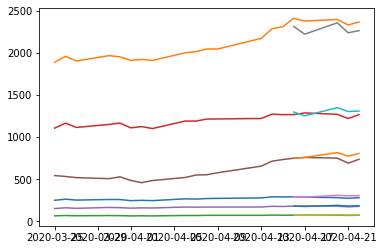

In [70]:
plt.plot(closes[-20:])
plt.plot(forecast)

In [36]:
mod = sm.tsa.VARMAX(closes[1:-10], order=(5,1))
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


KeyboardInterrupt: 

In [ ]:
pred = res.predict()

In [ ]:
import matplotlib.pyplot as plt
closes[1:-10].plot(figsize=(15,10))
pred.plot(figsize=(15,10))

In [23]:
res.forecast(5)

/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,AAPL,AMZN,FTEC,GOOG,MSFT,TSLA
81,0.553417,0.875650,0.544780,0.414235,0.770340,0.646160
82,0.493938,0.875400,0.482815,0.403857,0.685923,0.547309
83,0.448975,0.862828,0.478415,0.431769,0.693245,0.588074
84,0.508683,0.863781,0.551712,0.459561,0.756244,0.635008
85,0.494059,0.825617,0.529297,0.442968,0.696361,0.584362


In [25]:
min_max_scaler.inverse_transform(res.forecast(5))

/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


array([[ 281.27791747, 2317.21806845,   68.76941964, 1251.33920236,
         176.06773032,  720.61417719],
       [ 275.16164454, 2317.03522362,   67.17934683, 1246.46096641,
         171.61340982,  665.63348649],
       [ 270.53809048, 2307.83734018,   67.06643792, 1259.58143649,
         171.99974522,  688.30684476],
       [ 276.67783065, 2308.53450069,   68.94728948, 1272.64591245,
         175.32393803,  714.41126234],
       [ 275.17404066, 2280.61450857,   68.3721136 , 1264.84585231,
         172.16418386,  686.24199387]])

In [27]:
min_max_scaler.data_min_

array([ 224.36999512, 1676.60998535,   54.79000092, 1056.61999512,
        135.41999817,  361.22000122])